In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/dilshan/Documents/AI_ML_Course(zuu)/week03/zuu_crew_scores.csv')
df.head()
X = df['Attendance'].values
y = df['CapstoneScore'].values

In [4]:
X = (X - np.mean(X)) / np.std(X)


In [5]:
def compute_cost(X, y, beta_0, beta_1):
    m = len(y)
    predictions = predict(X, beta_0, beta_1)
    errors = predictions - y
    return (1/(2*m)) * np.sum(errors ** 2)


In [6]:
def compute_gradients(X, y, beta_0, beta_1):
    m = len(y)
    predictions = predict(X, beta_0, beta_1)
    error = predictions - y
    grad_0 = (1/m) * np.sum(error)
    grad_1 = (1/m) * np.sum(error * X)
    return grad_0, grad_1


In [ ]:
def gradient_descent(X, y, learning_rate=0.01, iteration=10000, tolerance=1e-6):
    beta_0 = 0
    beta_1 = 0
    cost_history = []
    

    for i in range(iteration):
        grad_0, grad_1 = compute_gradients(X, y, beta_0, beta_1)
        beta_0 -= learning_rate * grad_0
        beta_1 -= learning_rate * grad_1
        cost = compute_cost(X, y, beta_0, beta_1)
        cost_history.append(cost)
        

    return beta_0, beta_1, cost_history


Learning Rate: 1e-05, Final Cost: 1885.2590
Learning Rate: 0.001, Final Cost: 303.0199
Learning Rate: 0.1, Final Cost: 303.0199
Learning Rate: 1, Final Cost: 303.0199


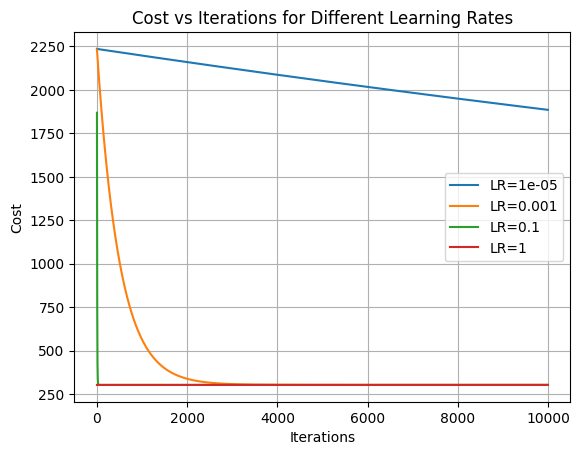

In [ ]:
learning_rates = [0.00001, 0.001, 0.1, 1]

for lr in learning_rates:
    b0, b1, cost_hist = gradient_descent(X, y, learning_rate=lr)
    print(f"Learning Rate: {lr}, Final Cost: {cost_hist[-1]:.4f}")
    plt.plot(cost_hist, label=f"LR={lr}")

plt.title("Cost vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X
